In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from matplotlib import pyplot as plt
plt.style.use('dark_background')

After we add the initial imports we can check our data for a first glance.

In [3]:
data=pd.read_csv('M:\\Mitsos\\Uni\\examino_6\\data_analytics\\final_assignment\\data\\bank-additional-full.csv',sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Our data has 21 columns , being mixed between categorical , numerical , binary (nominal) data and an extra columns (the last one) which represents the actual outcome we want to predict , if a client is opened a bank term deposit or not.
The columns 'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed' are not results from the marketing campaign , but indexes about the economy,consumer purchasing power and confidence etc.,and are based on the time the client was contacted

In [4]:
data.columns , data.shape


(Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
       dtype='object'),
 (41188, 21))

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Let's check if there are any missing values in any field.

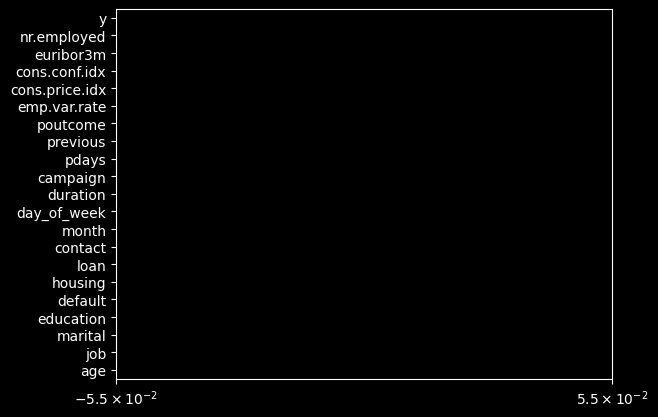

In [6]:
fig, ax = plt.subplots(1, 1)
data.isna().sum().plot.barh(ax=ax)

ax.set_xscale('symlog')

We have no missing (NaN) prices in our data.Now lets check our nominal/categorical data.

In [7]:
nominal = data.select_dtypes(exclude=["number","bool_"])
print("Unique values per nominal/categorical columns:")
for column in nominal.columns:
    print("------")
    print(column,":",getattr(nominal,column).unique())


Unique values per nominal/categorical columns:
------
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------
marital : ['married' 'single' 'divorced' 'unknown']
------
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------
default : ['no' 'unknown' 'yes']
------
housing : ['no' 'yes' 'unknown']
------
loan : ['no' 'yes' 'unknown']
------
contact : ['telephone' 'cellular']
------
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
------
poutcome : ['nonexistent' 'failure' 'success']
------
y : ['no' 'yes']


We can see that we have the value 'unknown' in most of the categorical fields of the dataset , which maybe means these values are missing or were not provided during the marketing campaign.

Let's create some plots on the categorical fields first to get a better view of our data.

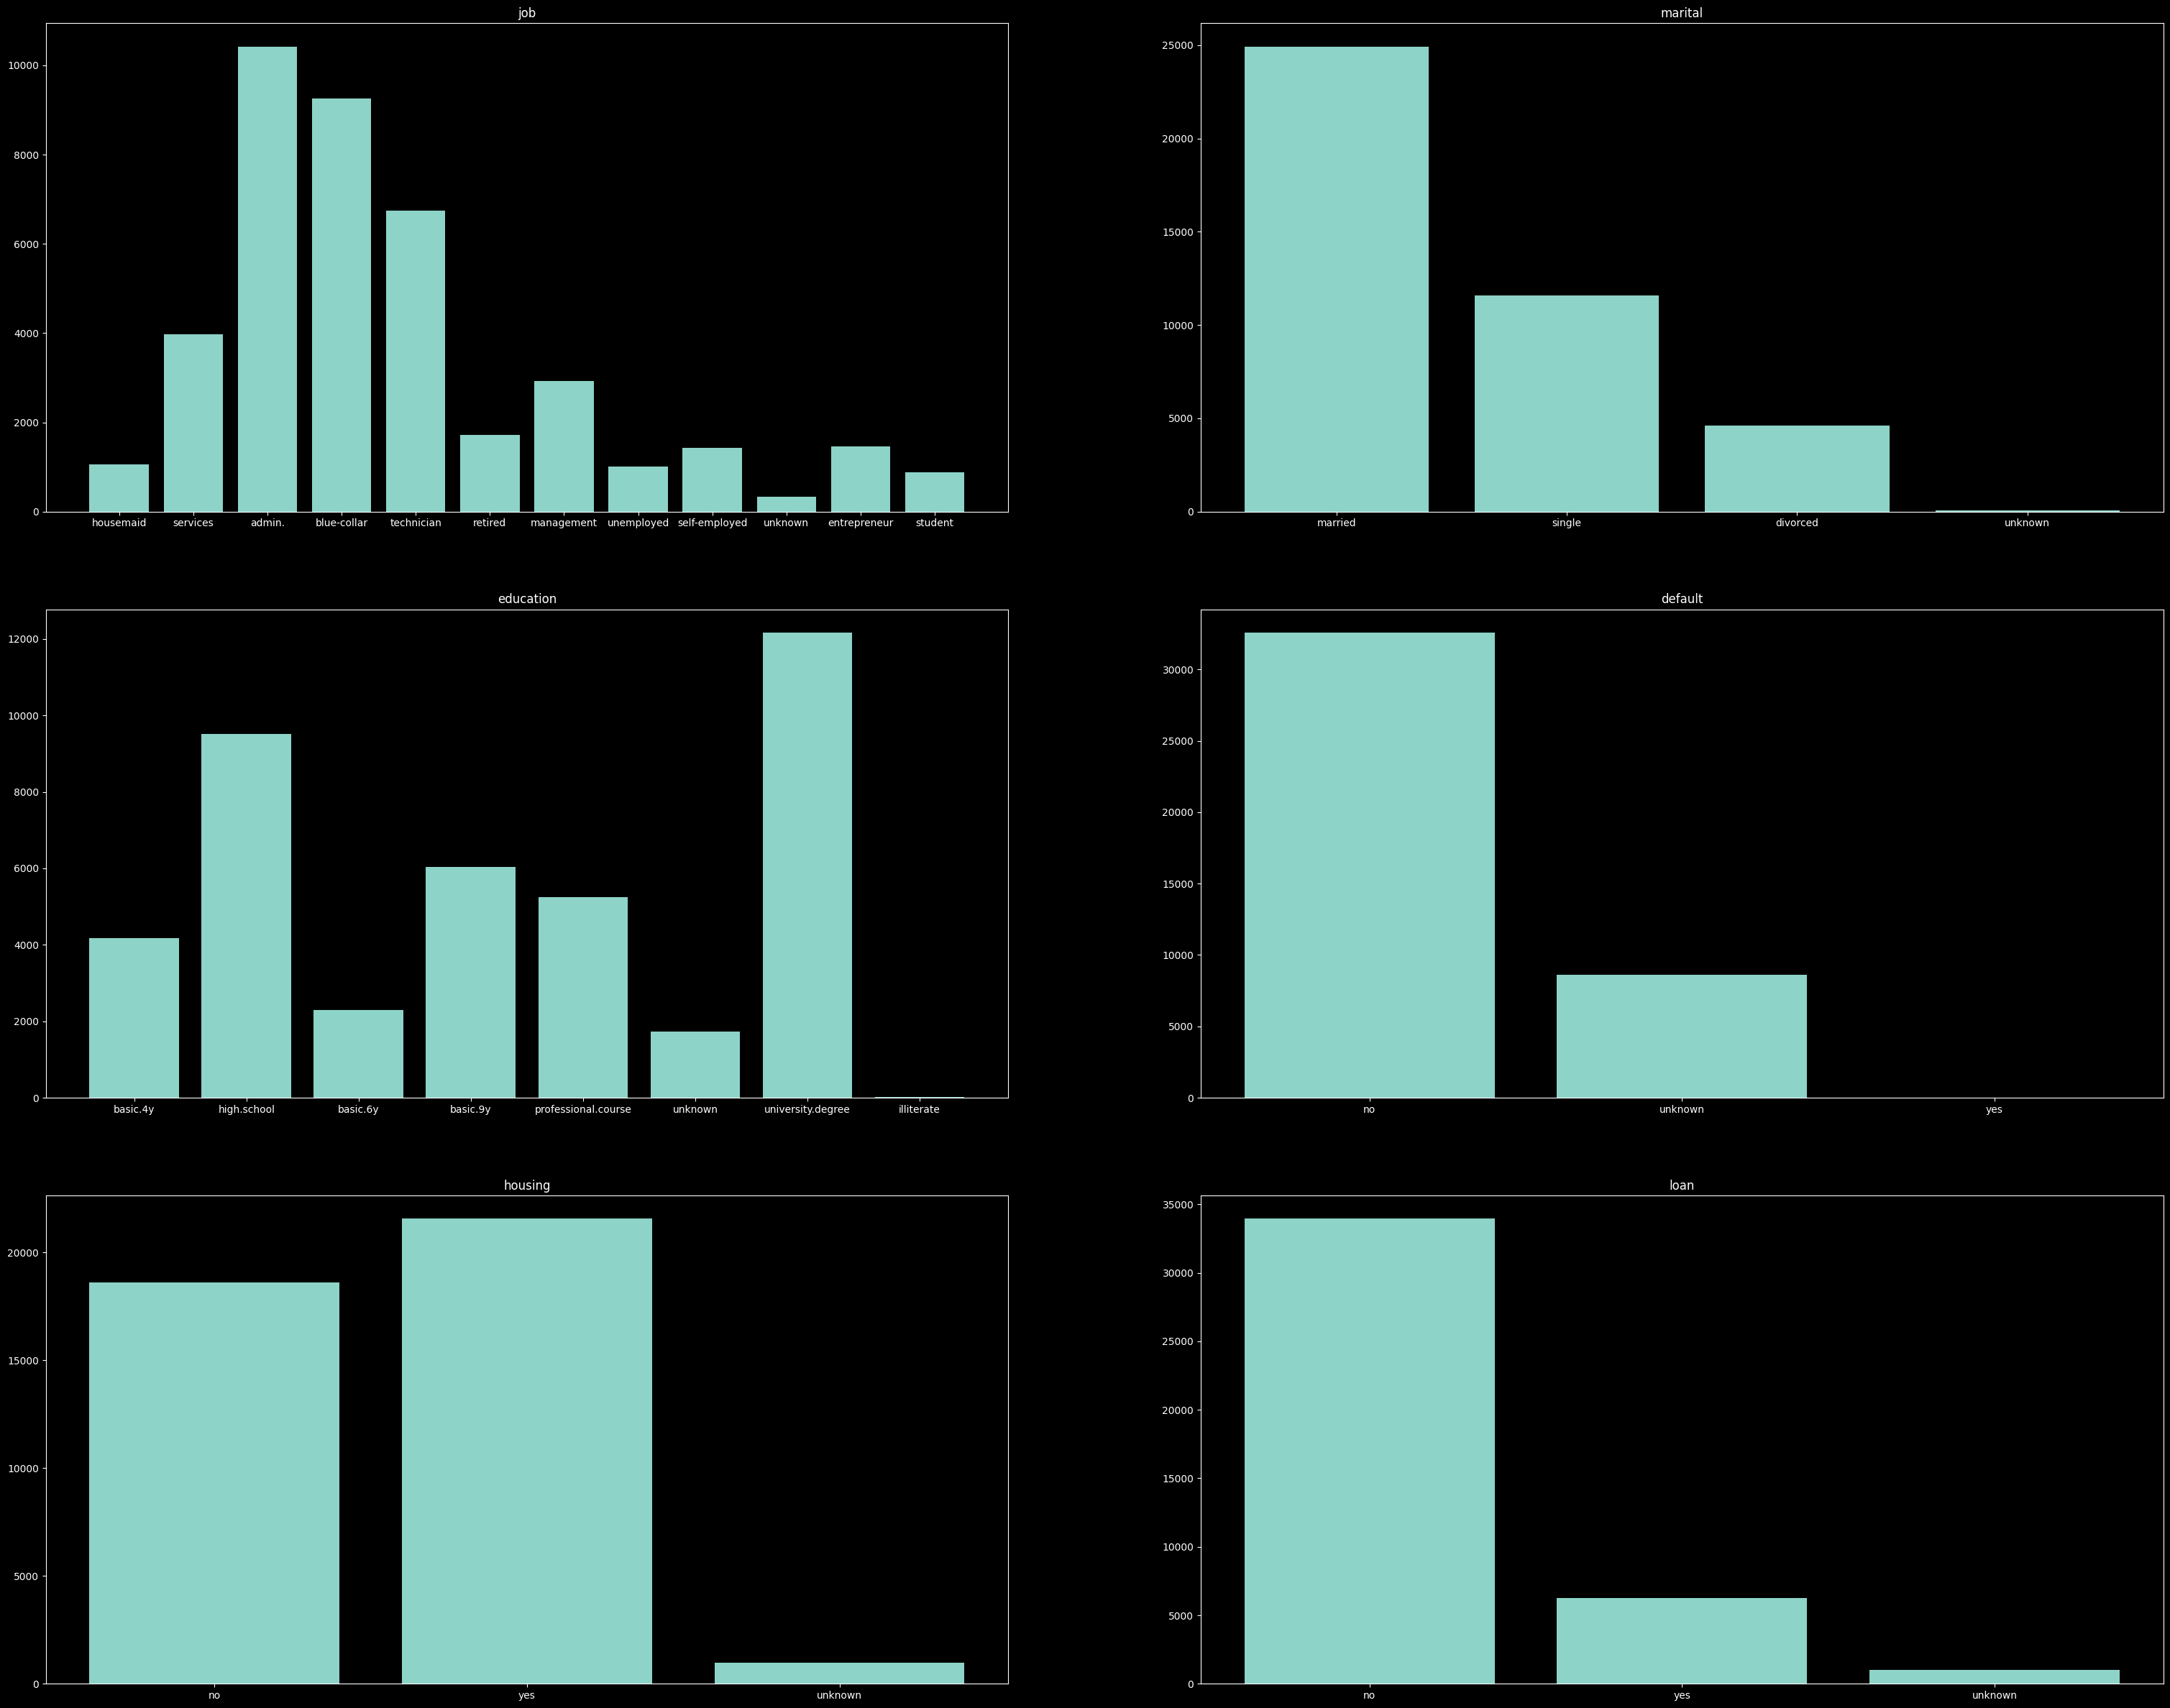

In [8]:
nominal_cols_of_interest=['job','marital','education','default','housing','loan']
dic ={}
fig,ax=plt.subplots(3,2,figsize=(38,30))
i=0
for column in nominal_cols_of_interest:
    dic={}
    unique_vals=getattr(data,column).unique()
    for unique_val in unique_vals:
        sum=data[column].value_counts()[unique_val]
        dic[unique_val]=sum
    ax[i//2,i%2].title.set_text(column)
    ax[i//2,i%2].bar(list(dic.keys()),list(dic.values()))
    i+=1


As we can see , the 'default' column is mostly comprised of 'no' values and then 'unknown'.This means that it doesnt provide us with any vital information about the data and may confuse learning models down the road , so i will go ahead and drop it.

In [9]:
data=data.drop(['default'],axis=1)

We will also drop the 'duration' column because it keeps track of the last call duration with the client , meaning that it can tell us whether a client didn't subscribe (if duration=0) and we can't know the outcome beforehand since we are trying to create a predictive model.

In [10]:
data=data.drop(['duration'],axis=1)

Now we will create some plots for the other nominal/categorical fields that have to do about the marketing campaign.
campaign column keeps count of how many times a client was contacted during this campaign
pdays column keeps count of how many days have passed since a client was last contacted.If a client was never contacted before , the value is 999.
previous column keeps count of how many times a client was contacted before this campaign.
poutcome keeps the outcome of the previous marketing campaign.

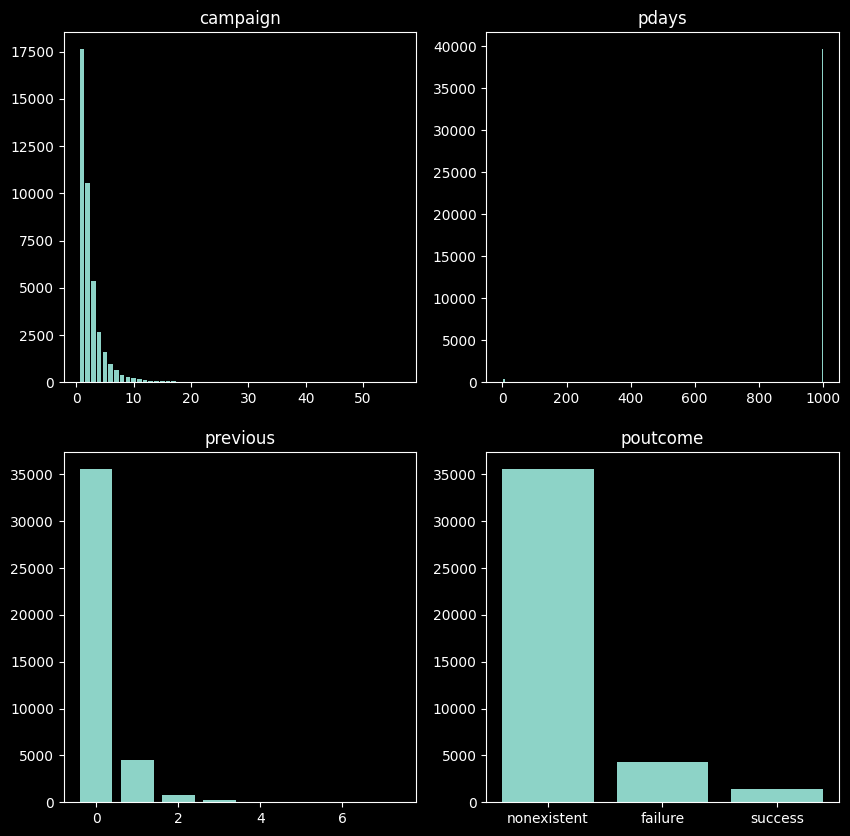

In [11]:
campaign_cols=['campaign','pdays','previous','poutcome']

fig,ax=plt.subplots(2,2,figsize=(10,10))
i=0
for campaign_col in campaign_cols:
    dic={}
    unique_vals = getattr(data,campaign_col).unique()
    for unique_val in unique_vals:
        sum=data[campaign_col].value_counts()[unique_val]
        dic[unique_val]=sum
    ax[i//2,i%2].title.set_text(campaign_col)
    ax[i//2,i%2].bar(list(dic.keys()),list(dic.values()))
    i+=1

As we can see most clients were contacted first during this campaign , also for most clients we dont know the outcome of the previous campaign , probably because they were not contacted before.
Let's check now how many of those clients where not contacted before (poutcome=unknown)

In [12]:
prev_unknown=data.query("poutcome=='nonexistent'")
print("Clients that we don't know the outcome of the last campaign: ",prev_unknown.shape[0],
"\nClients that we know they were not previously contacted and we dont know the outcome of the previous campaign:",prev_unknown[prev_unknown.pdays==999].shape[0],
"\nClients that were not contacted before: ",prev_unknown[prev_unknown.previous==0].shape[0])

Clients that we don't know the outcome of the last campaign:  35563 
Clients that we know they were not previously contacted and we dont know the outcome of the previous campaign: 35563 
Clients that were not contacted before:  35563


We can now search for the value 'unknown' in the dataset to see which records have missing values.

In [13]:
lost_data=data[data.apply(lambda row: row.astype(str).str.contains(('unknown'), case=False).any(), axis=1)]
print("The number of records with missing (unknown) values are : ",lost_data.shape[0])
print("This comprises ",lost_data.shape[0]/data.shape[0]," percent of our data")

The number of records with missing (unknown) values are :  2943
This comprises  0.07145285034476061  percent of our data


We have 2943 records/rows with data missing in at least on column.This is a small part of our dataset.As it seems , most records with the value 'unknown' in any column , had this value in the column 'default'.Since this is a small percentage of our data , we can go ahead and drop these records.

In [14]:
data=data.drop(lost_data.index,axis=0)

Let's check our categorical data now.

In [15]:
nominal = data.select_dtypes(exclude=["number","bool_"])
print("Unique values per nominal/categorical columns:")
for column in nominal.columns:
    print("------")
    print(column,":",getattr(nominal,column).unique())

Unique values per nominal/categorical columns:
------
job : ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
------
marital : ['married' 'single' 'divorced']
------
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
------
housing : ['no' 'yes']
------
loan : ['no' 'yes']
------
contact : ['telephone' 'cellular']
------
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
------
poutcome : ['nonexistent' 'failure' 'success']
------
y : ['no' 'yes']


As we can see , we have no missing values in our dataset now.I will also go ahead and drop the column day_of_week , considering that it doesnt matter that much to the output.
I will only keep the month a client was contacted , because the marketing campaign was done after the 2008 financial crisis and such a field can have some importance to us , due to the rapid change of the economy's situation during that time between each month.

In [16]:
data=data.drop(['day_of_week'],axis=1)

Our data is already prelabeled , the column 'y' contains the actual result of the marketing campaign.

In [17]:
data[data.y=='yes'].shape[0]/data.shape[0]

0.11133481500849784

Only 11% of the people contacted actually subscribed , which means our dataset is heavily skewed towards the negative-'no' class.
We will keep this in mind because later , during clustering and classification , we may need to undersample the majority class in order to draw conclusions.

Moving on now , we will continue with preprocessing our data using standard statistical methods and trying to find simple 'trends'.
Let's create a histogram for the age first.

Text(0, 0.5, '#People')

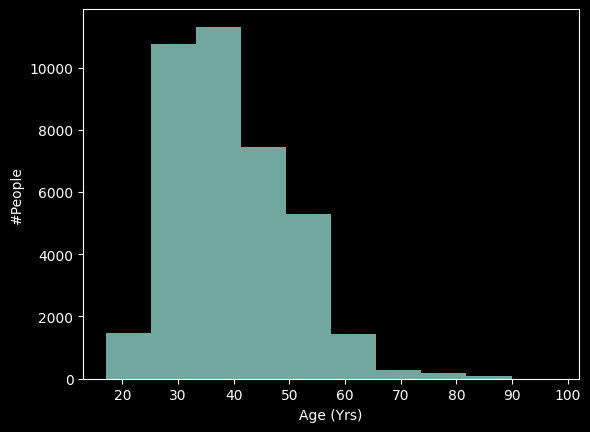

In [18]:
fig,ax = plt.subplots(1,1)

data.age.plot.hist(alpha=.8, ax=ax)
ax.set_xlabel('Age (Yrs)')
ax.set_ylabel('#People')


We will create some density plots for all of our numeric fields.

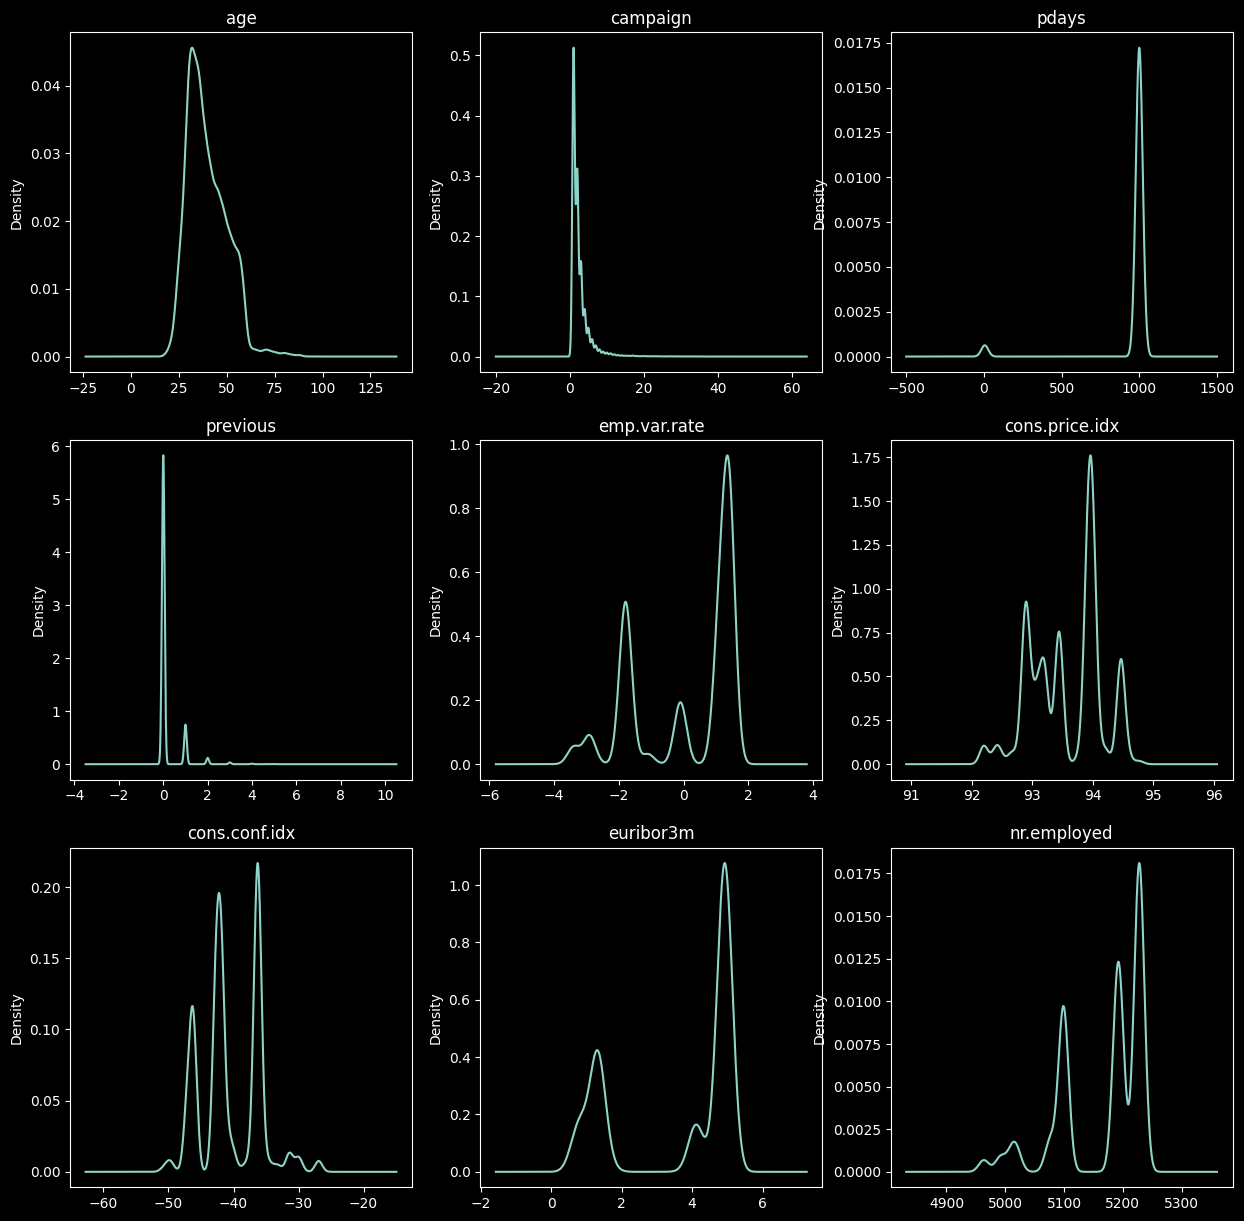

In [19]:
numeric_cols=data.select_dtypes('number').columns 

fig,ax=plt.subplots(3,3,figsize=(15,15))

for idx, (ax_i, feat) in enumerate(zip(ax.flatten(), numeric_cols)):
    data[feat].plot.density(ax=ax_i)
    ax_i.set_title(feat)

Now we will try to see if any correlation exists in our numeric data.

In [20]:
data.select_dtypes('number').corr(method='pearson')

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.005519,-0.038476,0.028479,-0.003563,-0.001236,0.127644,0.007695,-0.021054
campaign,0.005519,1.000000,0.051536,-0.078478,0.150752,0.128665,-0.010713,0.134783,0.143150
pdays,-0.038476,0.051536,1.000000,-0.581303,0.268705,0.080828,-0.090587,0.291953,0.366783
previous,0.028479,-0.078478,-0.581303,1.000000,-0.419647,-0.208783,-0.056856,-0.450672,-0.494617
emp.var.rate,-0.003563,0.150752,0.268705,-0.419647,1.000000,0.775418,0.211865,0.972422,0.907920
cons.price.idx,-0.001236,0.128665,0.080828,-0.208783,0.775418,1.000000,0.070521,0.689600,0.524272
cons.conf.idx,0.127644,-0.010713,-0.090587,-0.056856,0.211865,0.070521,1.000000,0.292641,0.115583
euribor3m,0.007695,0.134783,0.291953,-0.450672,0.972422,0.689600,0.292641,1.000000,0.945336
nr.employed,-0.021054,0.143150,0.366783,-0.494617,0.907920,0.524272,0.115583,0.945336,1.000000


<AxesSubplot: >

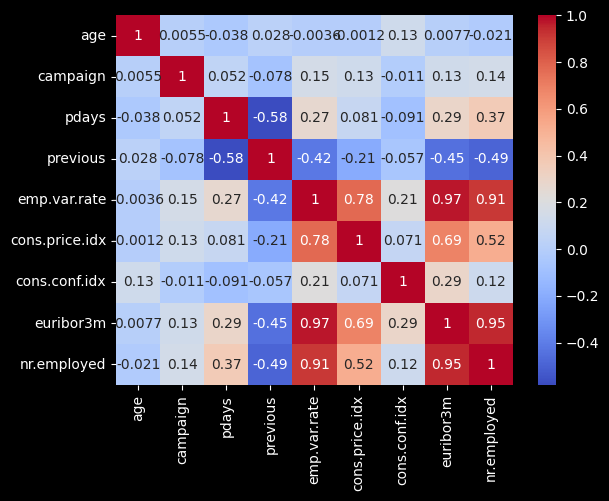

In [21]:
sns.heatmap(data.select_dtypes('number').corr(method='pearson'), cmap='coolwarm', annot=True)

As we can see , the some of the indexes (euribor3m-emp.var.rate) and (emp.var.rate-nr.employed) are really correlated.

Let's check the covariance in our data between pairs of fields.

<AxesSubplot: >

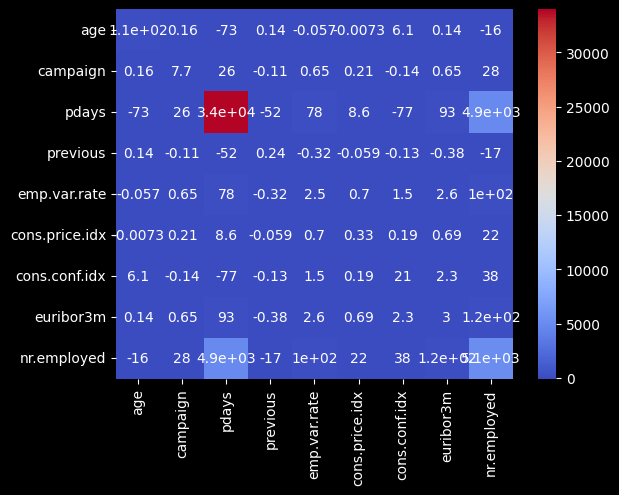

In [22]:
sns.heatmap(data.select_dtypes('number').cov(), cmap='coolwarm', annot=True)

Let's create some scatter plots to check if there is any other correlation in our data.

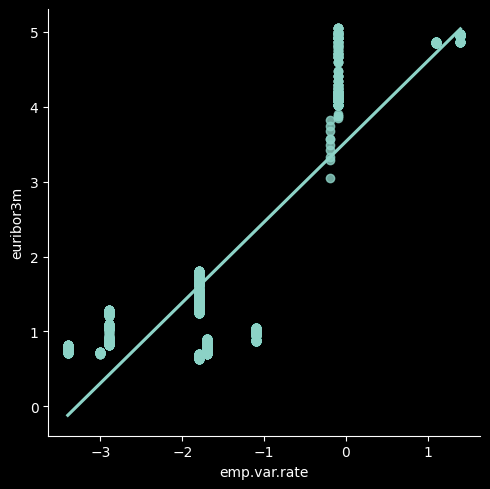

In [23]:
sns.lmplot(x="emp.var.rate", y="euribor3m", data=data, )

The plot shows there is a slight correlation between 'emp.var.rate' and 'euribor3m' , based on the line fit , but as we can see the points dont follow the line that fits the data.

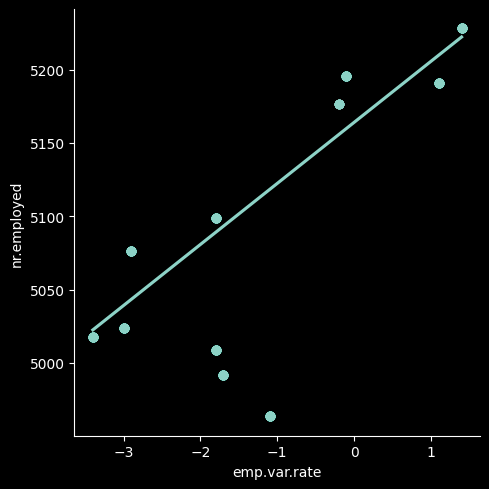

In [24]:
sns.lmplot(x="emp.var.rate", y="nr.employed", data=data, )

Once again , we can tell there is some correlation but the line fit is not a good approximation.

Let's also create a box plot for the age and check how many records are considered outliers based on the IQR method.

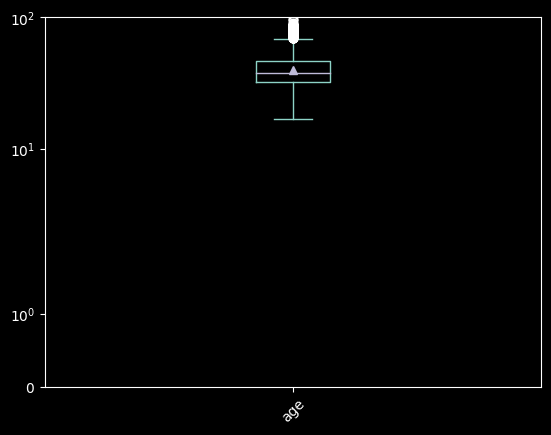

In [25]:
fig, ax = plt.subplots(1,1)

data[['age']].plot.box(ax=ax, rot=45, showmeans=True)

ax.set_ylim(0, 100)
ax.set_yscale('symlog')

In [26]:
feat = 'age'

q25, q75 = data.describe()[feat][['25%', '75%']]
iqr = q75 - q25

print("Upper limit of IQR method is:",q75 + 1.5*iqr," years")
print("Lower limit of IQR method is:",q25 -1.5*iqr," years")
outliers = data.loc[~data[feat].between(q25 - 1.5*iqr, q75 + 1.5*iqr, inclusive='both')].copy()
print("We have ",outliers.shape[0]," outlier records based on age in our data using  IQR method") 
print("From the above outliers , ",outliers[outliers[feat]>q75 + 1.5*iqr].shape[0]," are greater than the upper limit.")
print("And , ",outliers[outliers[feat]<q25 - 1.5*iqr].shape[0]," are smaller than the lower limit.")

Upper limit of IQR method is: 69.5  years
Lower limit of IQR method is: 9.5  years
We have  412  outlier records based on age in our data using  IQR method
From the above outliers ,  412  are greater than the upper limit.
And ,  0  are smaller than the lower limit.


The above results are weird , meaning we have clients with their age being recorded less than 18.We will drop these records considering the inconsistent.

In [27]:
under18=data[data['age']<18]
print("The number of clients with a recorded age less than 18 are : ",under18.shape[0])
data=data.drop(under18.index,axis=0)

The number of clients with a recorded age less than 18 are :  2


Lets check if there is a high percentage of people that subscribed in the outliers based on 'age'.

In [28]:
print("The percentage of the outliers based on 'age' that subscribed: ",outliers[outliers['y']=='yes'].shape[0]/outliers.shape[0])

The percentage of the outliers based on 'age' that subscribed:  0.44902912621359226


As we can see , a large part of the outliers subscribed.

In [29]:
print("The percentage of the outliers based on 'age' that subscribed out of the total subscribers is: ",outliers[outliers['y']=='yes'].shape[0]/data[data['y']=='yes'].shape[0])

The percentage of the outliers based on 'age' that subscribed out of the total subscribers is:  0.04344762799436355


Based on these , i will not drop the outliers based on age , since the comprise 5% of the minority class (minority class is 11% out of the total dataset).

Lets create a boxplot and check the outliers for the 'campaign' column as well.

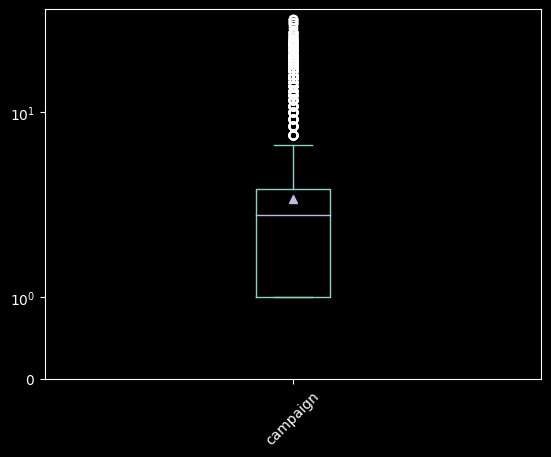

In [30]:
fig, ax = plt.subplots(1,1)

data[['campaign']].plot.box(ax=ax, rot=45, showmeans=True)

ax.set_ylim(0, 50)
ax.set_yscale('symlog')

In [31]:
feat = 'campaign'

q25, q75 = data.describe()[feat][['25%', '75%']]
iqr = q75 - q25

print("Upper limit of IQR method is:",q75 + 1.5*iqr)
print("Lower limit of IQR method is:",q25 -1.5*iqr)
outliers = data.loc[~data[feat].between(q25 - 1.5*iqr, q75 + 1.5*iqr, inclusive='both')].copy()
print("We have ",outliers.shape[0]," outlier records based on campaign column in our data using  IQR method") 
print("From the above outliers , ",outliers[outliers[feat]>q75 + 1.5*iqr].shape[0]," are greater than the upper limit.")
print("And , ",outliers[outliers[feat]<q25 - 1.5*iqr].shape[0]," are smaller than the lower limit.")

Upper limit of IQR method is: 6.0
Lower limit of IQR method is: -2.0
We have  2220  outlier records based on campaign column in our data using  IQR method
From the above outliers ,  2220  are greater than the upper limit.
And ,  0  are smaller than the lower limit.


Lets check if there is a high percentage of people that subscribed in the outliers based on 'campaign'.

In [32]:
print("The percentage of subscribers out of the outliers based on 'campaign' is: ",outliers[outliers['y']=='yes'].shape[0]/outliers.shape[0])
print("The percentage of subscribers that are outliers out of the total subscribers is : ",outliers[outliers['y']=='yes'].shape[0]/data[data['y']=='yes'].shape[0])

The percentage of subscribers out of the outliers based on 'campaign' is:  0.04504504504504504
The percentage of subscribers that are outliers out of the total subscribers is :  0.023485204321277594


This is not a large part of the subscribers so i will go ahead and drop these outliers.

In [33]:
data=data.drop(outliers.index,axis=0)

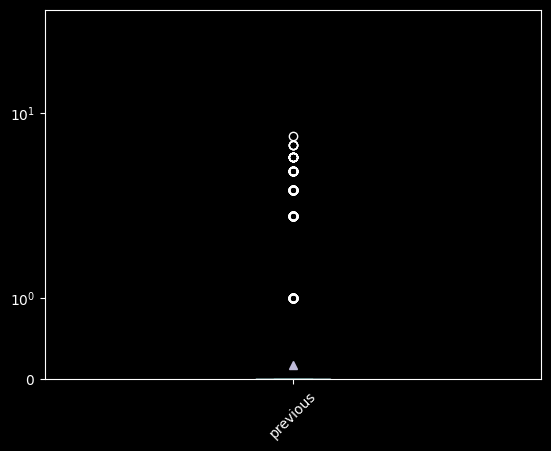

In [34]:
fig, ax = plt.subplots(1,1)

data[['previous']].plot.box(ax=ax, rot=45, showmeans=True)

ax.set_ylim(0, 50)
ax.set_yscale('symlog')

In [35]:
feat = 'previous'

q25, q75 = data.describe()[feat][['25%', '75%']]
iqr = q75 - q25

print("Upper limit of IQR method is:",q75 + 1.5*iqr)
print("Lower limit of IQR method is:",q25 -1.5*iqr)
outliers = data.loc[~data[feat].between(q25 - 1.5*iqr, q75 + 1.5*iqr, inclusive='both')].copy()
print("We have ",outliers.shape[0]," outlier records based on previous column in our data using  IQR method") 
print("From the above outliers , ",outliers[outliers[feat]>q75 + 1.5*iqr].shape[0]," are greater than the upper limit.")
print("And , ",outliers[outliers[feat]<q25 - 1.5*iqr].shape[0]," are smaller than the lower limit.")

Upper limit of IQR method is: 0.0
Lower limit of IQR method is: 0.0
We have  5086  outlier records based on previous column in our data using  IQR method
From the above outliers ,  5086  are greater than the upper limit.
And ,  0  are smaller than the lower limit.


There is no reason to check for outliers in the rest of the columns because 'pdays' might have a lot of outliers because people that were not contacted before have a value of 'pdays' equal to 999 in order to be able to tell them apart from the rest.
Also the previous column has a lot of outliers because most of the people were not contacted in a previous campaign, because the upper and lower limit of IQR is 0 , meaning that if we drop the outliers we will drop a large percentage of people that were contacted in previous marketing campaigns.
Also the rest of the numeric fields are indexes , which means they are a recorded value at a set time , meaning we might find a lot of outliers if most of the contacts were done in specific time and might delete past/future records due to the index change , so i will not do outliers search based on these columns.
Now i will move on the last step , to convert the dataset attributes in an appropriate form for clustering/classification.
I will normalize all numeric fields first.

In [36]:
data['age']=(data['age']-data['age'].mean())/data['age'].std()
data['campaign']=(data['campaign']-data['campaign'].mean())/data['campaign'].std()
data['pdays']=(data['pdays']-data['pdays'].mean())/data['pdays'].std()
data['previous']=(data['previous']-data['previous'].mean())/data['previous'].std()
data['euribor3m']=(data['euribor3m']-data['euribor3m'].mean())/data['euribor3m'].std()
data['emp.var.rate']=(data['emp.var.rate']-data['emp.var.rate'].mean())/data['emp.var.rate'].std()
data['cons.price.idx']=(data['cons.price.idx']-data['cons.price.idx'].mean())/data['cons.price.idx'].std()
data['cons.conf.idx']=(data['cons.conf.idx']-data['cons.conf.idx'].mean())/data['cons.conf.idx'].std()
data['nr.employed']=(data['nr.employed']-data['nr.employed'].mean())/data['nr.employed'].std()
data.head()

,age,job,marital,education,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.565151,housemaid,married,basic.4y,no,no,telephone,may,-0.815911,0.197468,-0.357189,nonexistent,0.67414,0.755457,0.886074,0.734104,0.35332,no
1,1.662126,services,married,high.school,no,no,telephone,may,-0.815911,0.197468,-0.357189,nonexistent,0.67414,0.755457,0.886074,0.734104,0.35332,no
2,-0.277373,services,married,high.school,yes,no,telephone,may,-0.815911,0.197468,-0.357189,nonexistent,0.67414,0.755457,0.886074,0.734104,0.35332,no
3,0.013552,admin.,married,basic.6y,no,no,telephone,may,-0.815911,0.197468,-0.357189,nonexistent,0.67414,0.755457,0.886074,0.734104,0.35332,no
4,1.565151,services,married,high.school,no,yes,telephone,may,-0.815911,0.197468,-0.357189,nonexistent,0.67414,0.755457,0.886074,0.734104,0.35332,no


In [37]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Now i have two ways to encode the categorical fields into a numeric representation.One is to label encode them (assign a discrete numeric value to each unique value per attribute) or one hot encode them (create a new binary column for every unique value per attribute were only one is 'activated' per record).
I will choose one hot encoding for this step , because label encoding can confuse machine learning models due to the different price per unique value which may suggest a comperative relationship between each unique value .One hot encoding does not suggest any relationship between unique values.

In [38]:
nominal = data.select_dtypes(exclude=["number","bool_"])
print("Unique values per nominal/categorical columns:")
for column in nominal.columns:
    print("------")
    print(column,":",getattr(nominal,column).unique())

Unique values per nominal/categorical columns:
------
job : ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
------
marital : ['married' 'single' 'divorced']
------
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
------
housing : ['no' 'yes']
------
loan : ['no' 'yes']
------
contact : ['telephone' 'cellular']
------
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------
poutcome : ['nonexistent' 'failure' 'success']
------
y : ['no' 'yes']


In [39]:
encoded_cols=pd.get_dummies(data[['job','marital','education','poutcome','month']],dtype=int)
data=data.drop(['job','marital','education','poutcome','month'],axis=1)
data=pd.concat([data,encoded_cols],axis=1)
data.head()

,age,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.565151,no,no,telephone,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0
1,1.662126,no,no,telephone,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0
2,-0.277373,yes,no,telephone,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0
3,0.013552,no,no,telephone,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0
4,1.565151,no,yes,telephone,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0


The rest of the categorical/nominal columns contain only two discrete values , so there is no need to onehot encode them.We will keep them as binary (0 or 1) attributes.

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['housing']=label_encoder.fit_transform(data['housing'])
data['loan']=label_encoder.fit_transform(data['loan'])
data['contact']=label_encoder.fit_transform(data['contact'])
data['y']=label_encoder.fit_transform(data['y'])
data.head()

,age,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.565151,0,0,1,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0
1,1.662126,0,0,1,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0
2,-0.277373,1,0,1,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0
3,0.013552,0,0,1,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0
4,1.565151,0,1,1,-0.815911,0.197468,-0.357189,0.67414,0.755457,0.886074,...,0,0,0,0,0,0,1,0,0,0


This is the finalized form of our data.I will go ahead and export them now to continue with clustering and classification.

In [42]:
data.to_csv('./data/preprocessed_final_data.csv',index=False)